In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

df=pd.read_csv('../datasets/SVM_Dataset2.csv')
df

,x1,x2,y
0,7.0,20,-1
1,8.0,12,-1
2,9.0,19,-1
3,10.0,17,-1
4,11.0,15,-1
5,13.0,14,-1
6,14.0,12,-1
7,15.0,14,-1
8,15.0,17,-1
9,16.0,16,-1


In [3]:
feature_cols = ['x1', 'x2']
X_train = np.array(df[feature_cols])
X_train

array([[ 7. , 20. ],
       [ 8. , 12. ],
       [ 9. , 19. ],
       [10. , 17. ],
       [11. , 15. ],
       [13. , 14. ],
       [14. , 12. ],
       [15. , 14. ],
       [15. , 17. ],
       [16. , 16. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [ 7. , 10. ],
       [ 8. , 10. ],
       [ 9. ,  9. ],
       [10. ,  8. ],
       [11. ,  5. ],
       [12. ,  7. ],
       [12. ,  9. ],
       [13. , 10. ]])

In [4]:
y_train = df['y'].values
y_train

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [17]:
# svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier = svm.SVC(kernel='poly', C=10, degree=2)
# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
svm_classifier.fit(X_train, y_train)

/Users/luciareynoso/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
color_ls = list(map(lambda x: 'b' if x==1 else 'r', y_train))
color_ls

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b']

In [13]:
label = list(map(lambda x: 'H' if x==1 else 'NH', y_train))
label

['NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'NH',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H']

array([[ 8. , 12. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [13. , 10. ]])

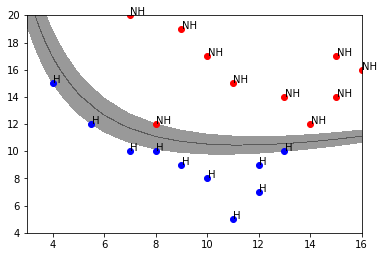

In [18]:
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    

plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])
    
svm_classifier.support_vectors_